IPL 2022 Capstone Project


The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.
These are some of the important columns that we'll focus on for meaningful insights in this project. column names: Variable Type

* date: string

* venue: string

* stage: string

* team1: string

* team2: string

* toss_winner: string

* toss_decision: string

* first_ings_score: integer

* second_ings_score: integer

* match_winner: string

* won_by: string

* margin: integer

* player_of_the match: string

* top_scorer: string

* highscore: integer

* best_bowling: string

* best_bowling_fgure: string

* gure: string

***************************************************************************************************************************************************************

Loading the Libraries and Dataset

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"C:\Users\subha\Downloads\IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Basic information

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns

In [105]:
print(f"Your rows are { df.shape[0]} and your columns are {df.shape[1]}")

Your rows are 74 and your columns are 20


Now lets see how many null values in in total.

In [106]:
df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Which team won the most matches?

In [107]:
match_wins=df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match win by teams')

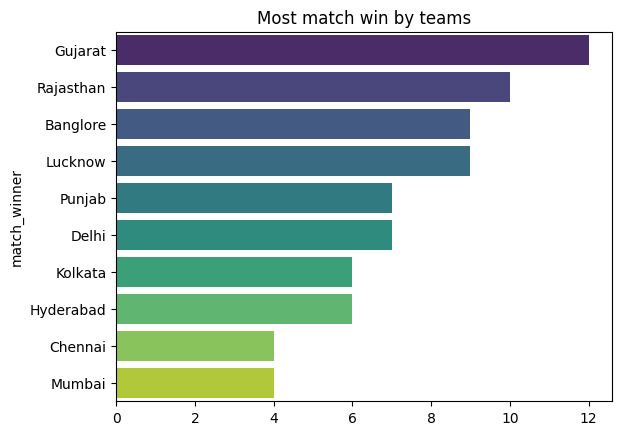

In [108]:
sns.barplot(y=match_wins.index,x=match_wins.values,palette='viridis')
plt.title('Most match win by teams')

Toss decision trend

Text(0.5, 1.0, 'Toss Decision Trends')

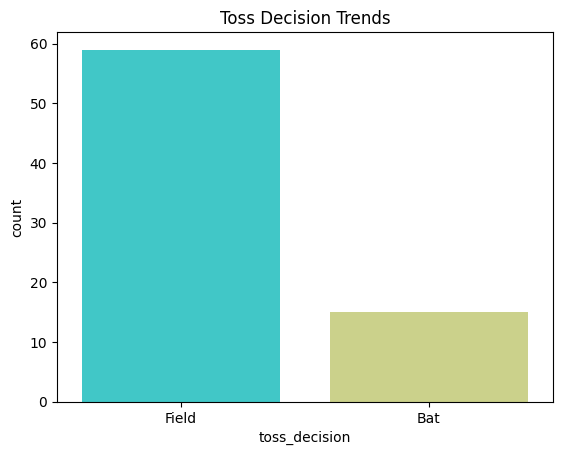

In [109]:
sns.countplot(x=df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Trends')

Toss winner VS Match winner

In [110]:
count=df[df['toss_winner']==df['match_winner']]['match_id'].count()
count
percentage=(count*100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

How do teams win?(runs vs wickets)

Text(0.5, 1.0, 'Won By')

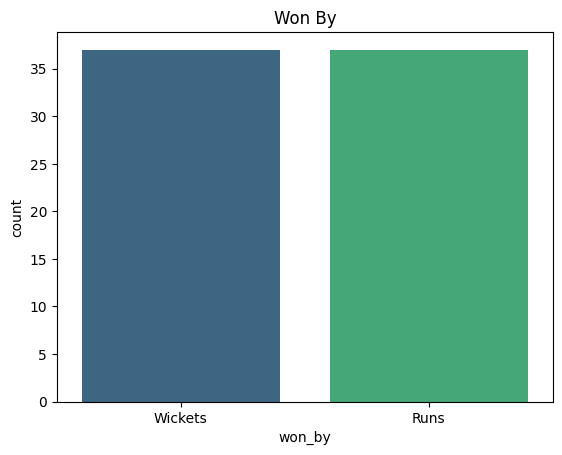

In [111]:
sns.countplot(x=df['won_by'],palette='viridis')
plt.title('Won By')

Key player Performance

Most 'Player of the Match' awards

In [112]:
P_Match_count=df['player_of_the_match'].value_counts().head(5)
P_Match_count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 Player Of The Match Awards')

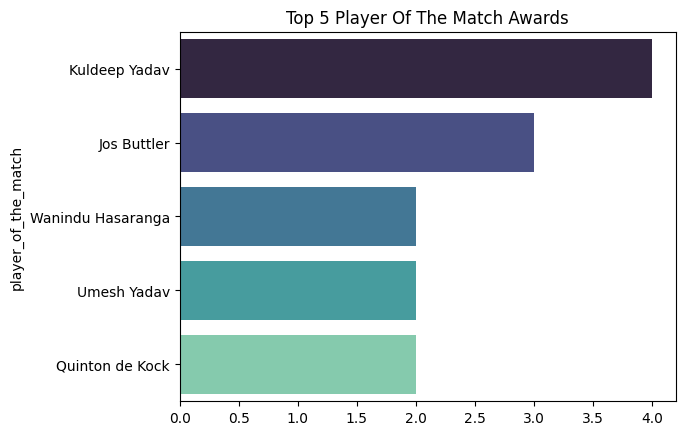

In [113]:
sns.barplot(x=P_Match_count.values,y=P_Match_count.index,palette='mako')
plt.title('Top 5 Player Of The Match Awards')

2 Top Scores

In [114]:
High_score=df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
High_score

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

Text(0.5, 1.0, 'Top 2 Scores')

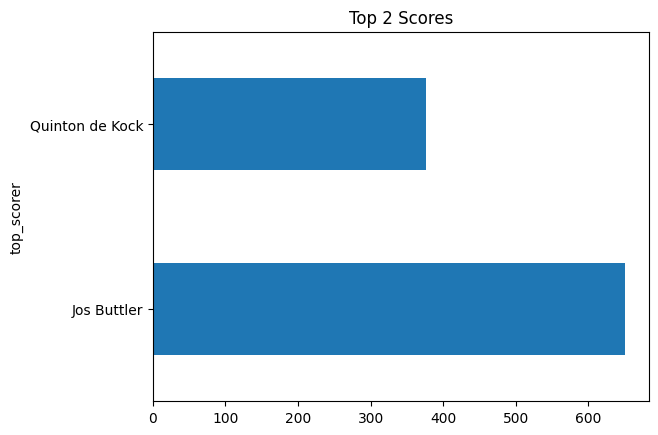

In [115]:
High_score.plot(kind='barh')
plt.title('Top 2 Scores')

10 best Bowling Figures

In [116]:
df['Highest_wickets']=df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df['Highest_wickets']=df['Highest_wickets'].astype(int)
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,Highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,...,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26,3
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,...,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14,1
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,...,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43,3
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,...,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22,3


In [117]:
top_bowlers=df.groupby('best_bowling')['Highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: Highest_wickets, dtype: int64

Text(0.5, 1.0, 'Top 10 Best Bowling Figures')

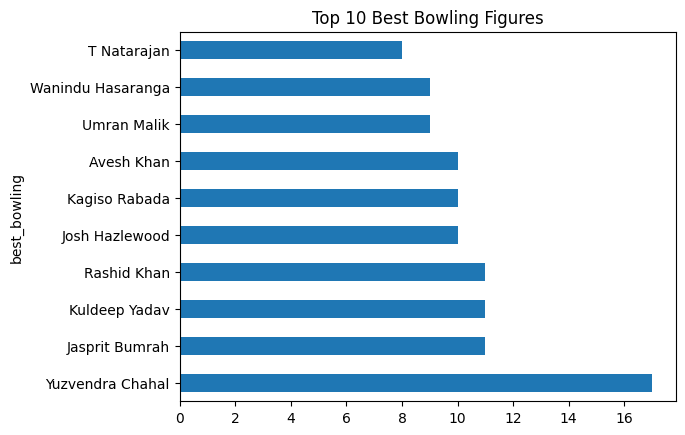

In [118]:
top_bowlers.plot(kind='barh')
plt.title('Top 10 Best Bowling Figures')

Venue Analysis

Most match played by venue

In [119]:
venue_count=df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match Played By Venue')

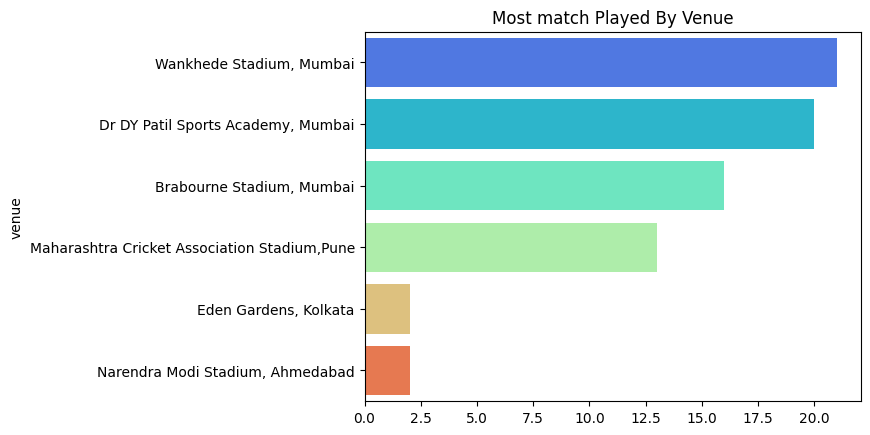

In [120]:
sns.barplot(y=venue_count.index,x=venue_count.values,palette='rainbow')
plt.title('Most match Played By Venue')

Who won the highest margin by runs?

In [121]:
df[df['won_by']=='Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Which Player has the highest  individual score?

In [122]:
df[df['highscore'] == df['highscore'].max()][['top_scorer', 'highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Which Bowler had the best bowling figures?

In [123]:
df[df['Highest_wickets']==df['Highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
